In [2]:


import helper
import numpy as np
import pandas as pd

%matplotlib inline
!pip install python-bidi
!pip install arabic_reshaper


from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from PIL import Image


In [18]:

X_full = pd.read_csv('/content/dattta.csv', error_bad_lines=False, sep=',', encoding='utf-8')
print(X_full.head())
X_tun = X_full[X_full.index.map(lambda x: x%2==1)]
X_tun.reset_index(drop=True, inplace=True)
X_tun.rename(columns={"selection1_name": "tn"}, inplace=True)
X_en =  X_full[X_full.index.map(lambda x: x%2==0)]
X_en.reset_index(drop=True, inplace=True)
X_en.rename(columns={"selection1_name": "en"}, inplace=True)

data = pd.concat([X_en, X_tun], axis=1)
# data.to_csv('data_train.csv')
data

                                     selection1_name
0  Take the kid by the hand and cross the street ...
1                    شد إطفل من يدو وشق بيه إلكياس
2       He took the chair with his leg and threw it.
3                           شد إلكرسي من ساقو ورماه
4               Grab the rope well and don't let go.


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,en,tn
0,Take the kid by the hand and cross the street ...,شد إطفل من يدو وشق بيه إلكياس
1,He took the chair with his leg and threw it.,شد إلكرسي من ساقو ورماه
2,Grab the rope well and don't let go.,شد الحبل بالقوي وماتسيبوش
3,Messi got into a pattern of scoring every match.,ميسي شد الريتم متاع التسجيل في كل ماتش
4,He held to his opinion and didn't want to chan...,شد في رايو وما حبش يبدل فكرتو
...,...,...
13032,"to take a place over, colonize",إحتل مكان
13033,"change, switch",تَبْدِيلْ
13034,"underground, underneath",تَحْتِيَّة
13035,they're torturing him (cutting his fingernails...,إقُصُّولُو ضْوَافْرُو بِالكُلَّابْ


In [9]:
# Function for word count
def word_count (txt):
    return len(txt.split())

#Applying the Word Count Function to Eng & French Columns
data['En_Count'] = data['en'].apply(lambda x: word_count(x))
data['Tn_Count'] = data['tn'].apply(lambda x: word_count(x))


print( '{} English Words'.format(data['En_Count'].sum()) ) 
print('{} Tunisian Words'.format(data['Tn_Count'].sum()) )
      

#thzt is how we learnt thzt our dataset wasn't explioct!!!!!

47340 English Words
19970 Tunisian Words


In [17]:


fig = make_subplots(rows=1, cols=2, subplot_titles=("English","Tunsi"))

fig.add_trace(
    go.Histogram(x=data['En_Count'],histfunc='sum',opacity =0.8,showlegend=False,text='En'), row=1,col=1)

fig.add_trace(
    go.Histogram(x=data['Tn_Count'],histfunc='sum', opacity =0.8,showlegend=False,text='Tn'), row=1,col=2)

fig.update_layout(height=600, width=800, title_text="Words Distribution")
fig.show()




In [6]:
data.describe()

,en,tn
count,13037,13037
unique,12052,12042
top,"fun, good time",صَادَقْ
freq,4,5


In [8]:

#Checking for Null/Missing Values
data.isna().sum()

en    0
tn    0
dtype: int64

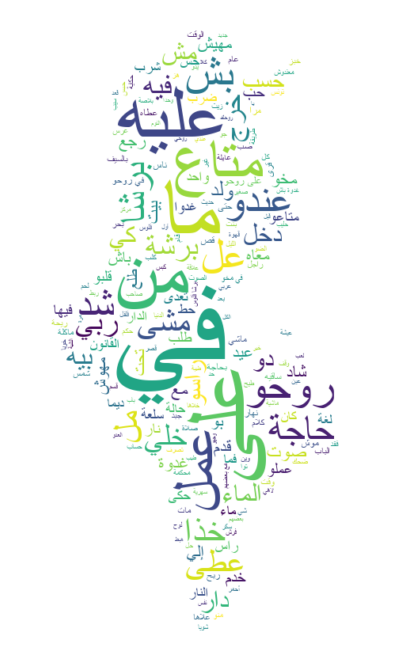

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

tun_mask = np.array(Image.open("/content/21190422.jpg"))
stpword = set(STOPWORDS)
sample_corpus=' '.join(data['tn'])
data_sample = arabic_reshaper.reshape(sample_corpus)
data_sample = get_display(data_sample) # add this  
WordCloud = WordCloud(font_path='/content/arial.ttf', 
                      background_color='white', mode='RGB', width=800, mask=tun_mask,
                      height=800,stopwords=stpword).generate(data_sample)
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(WordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

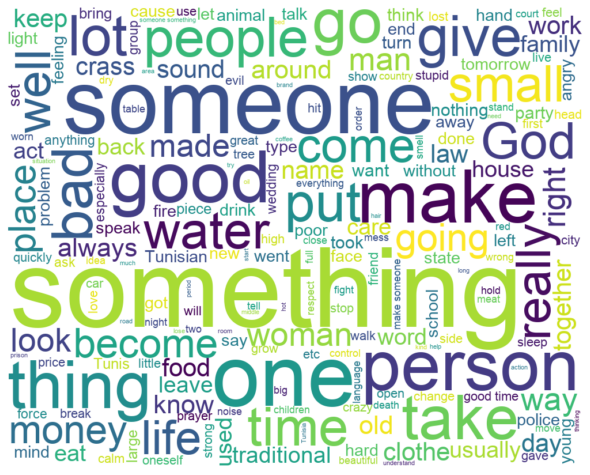

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)

sample_corpus=' '.join(data['en'])
wordcloud = WordCloud(font_path='/content/arial.ttf', width = 1000, height = 800,
                background_color ='white',
                stopwords = stopwords, mode='RGB').generate(sample_corpus)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()